# Correlation Analysis of House Sale Price and House Attributes

## Objectives

* Correlation Analysis of the house sale price in Ames and house features

## Inputs

* `house_prices_records.csv` data located at outputs/datasets/collection

## Imports and Setup

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.encoding import OneHotEncoder

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Set the parent of the current directory as the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

# Load Data

Load the `house_prices_records` data.

In [5]:
df = pd.read_csv('outputs/datasets/collection/house_prices_records.csv')
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Correlation of Numerical Variables with `SalePrice`

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()['SalePrice'].sort_values(key=abs, ascending=False)[1:]
print(corr)

OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64


# Correlation Heatmap for Numerical Variables

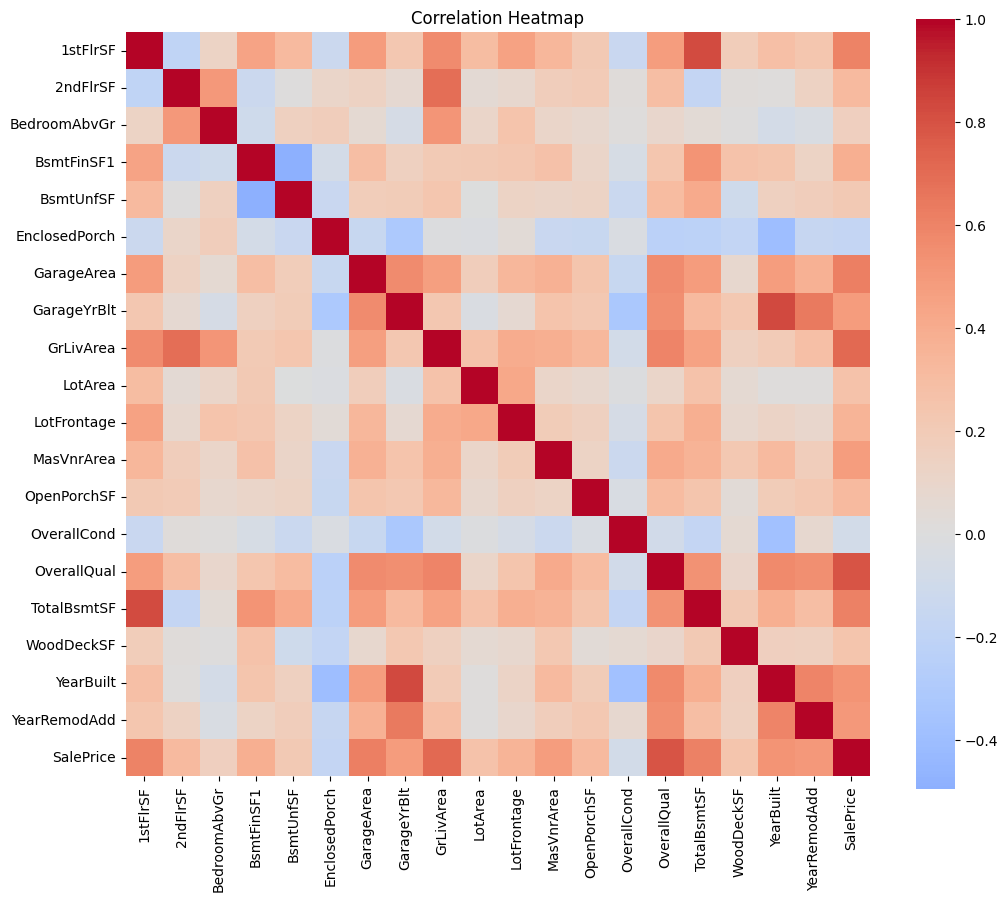

In [14]:
%matplotlib inline
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, square=True)
plt.title("Correlation Heatmap")
plt.show()

In the above correlation heatmap, 
* remove upper half of the triange (above diagonal squares) for a clearer depiction, 
* add 2-decimal point correlation values in squares for more information,
* add space between squares for a cleaner look.

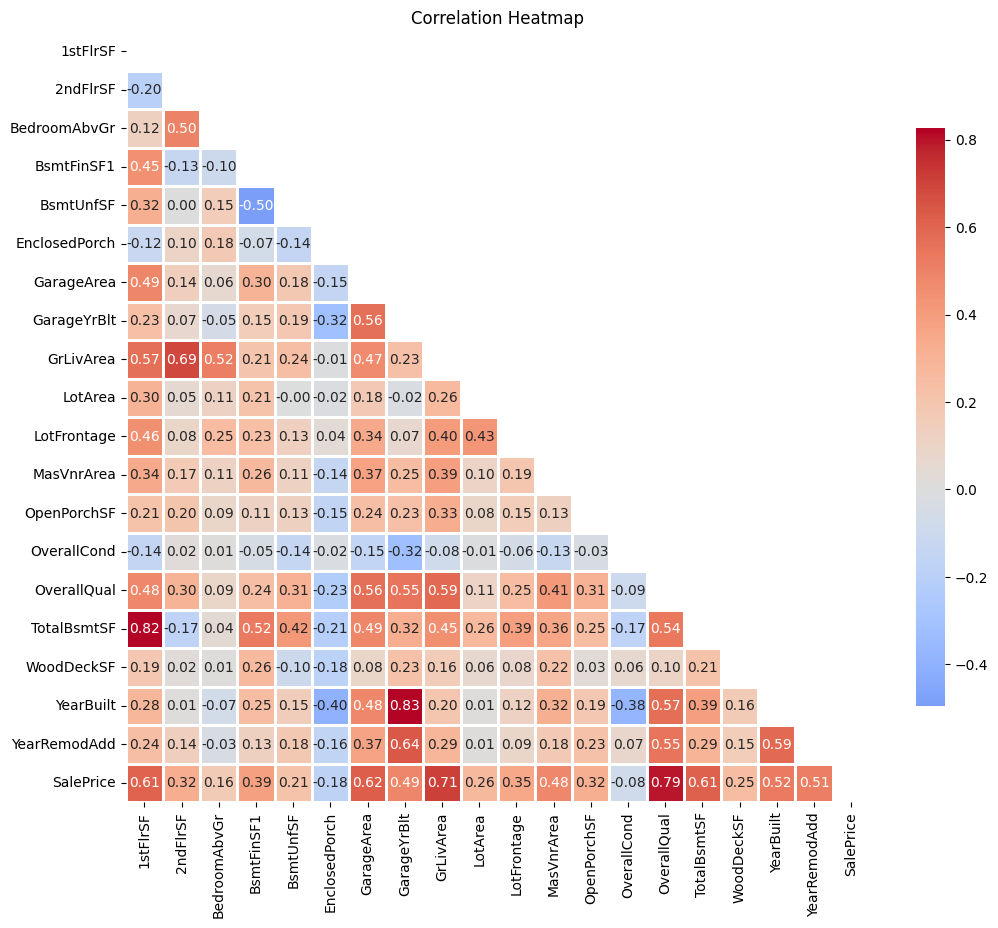

In [16]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt="0.2f", 
    mask=mask, linewidths=1, cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap")
plt.show()

# Visual Representation of Correlations

# Conclusions and Next Steps

* Next steps will be to modify the data with appropriate transformations for a more symmetric distribution of numerical variables
* Impute missing values, where possbile
* Transform some variables approprite to the content. For example, instead of looking at the first and second floor squarefeet, these two may be summed to look at the total squarefeet, in particular when there is very high level of missingess for the latter. 